<a href="https://colab.research.google.com/github/EmmanuelRamos143/AA/blob/main/Tarea7/Classificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carga inicial de datos
import warnings
warnings.filterwarnings('ignore')
import sys

sys.path.append('/content/HeartAttack.py')
from HeartAttack import *

heart_df = HeartAttackHelper.obtainHearthDF()

display(Markdown(heart_df.head().to_markdown()))

|    |   age |   sex |   cp |   trtbps |   chol |   fbs |   restecg |   thalachh |   exng |   oldpeak |   slp |   caa |   thall |   output |
|---:|------:|------:|-----:|---------:|-------:|------:|----------:|-----------:|-------:|----------:|------:|------:|--------:|---------:|
|  0 |    63 |     1 |    3 |      145 |    233 |     1 |         0 |        150 |      0 |       2.3 |     0 |     0 |       1 |        1 |
|  1 |    37 |     1 |    2 |      130 |    250 |     0 |         1 |        187 |      0 |       3.5 |     0 |     0 |       2 |        1 |
|  2 |    41 |     0 |    1 |      130 |    204 |     0 |         0 |        172 |      0 |       1.4 |     2 |     0 |       2 |        1 |
|  3 |    56 |     1 |    1 |      120 |    236 |     0 |         1 |        178 |      0 |       0.8 |     2 |     0 |       2 |        1 |
|  4 |    57 |     0 |    0 |      120 |    354 |     0 |         1 |        163 |      1 |       0.6 |     2 |     0 |       2 |        1 |

Clasificación

Los problemas de clasificación buscan predecir las categorías a las que pertenecen las variables dependientes. Por ejemplo, saber si un cliente será moroso, si un paciente tiene cierta enfermedad, etc. son problemas de clasificación.

Para nuestro caso teniendo las variables seleccionadas determinaremos si dado las variables dependientes tenemos una enfermedad del corazón.


In [ ]:
import numpy as np
train , test = np.split(heart_df.sample(frac = 1) , [int(0.8 * len(heart_df))])

In [ ]:
#Helper method para 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def pre(dataframe):
    x = dataframe.drop("output" , axis = 1)
    y = dataframe["output"]
    
    sc = StandardScaler()
    pca = PCA(n_components = 3)
    
    x_sc = sc.fit_transform(x)
    
    X = pca.fit_transform(x_sc)
    X = pd.DataFrame(X)
    
    return X , y

In [ ]:
## Dividimos los datos en train y test
X_train , Y_train = pre(train)
X_test , Y_test = pre(test)

In [ ]:
##Uso de SVC
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train , Y_train)

SVC()

In [ ]:
#Uso de classificador Random Forest
from sklearn.ensemble import RandomForestClassifier 
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train , Y_train)

RandomForestClassifier()

In [ ]:
#Uso de clasificador arbol de decisiones
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train , Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of" , model_svc , "is" , accuracy_score(Y_test , model_svc.predict(X_test)))
print("Accuracy of" , model_rfc , "is" , accuracy_score(Y_test , model_rfc.predict(X_test)))
print("Accuracy of" , model_dt , "is" , accuracy_score(Y_test , model_dt.predict(X_test)))

Accuracy of SVC() is 0.8360655737704918
Accuracy of RandomForestClassifier() is 0.8032786885245902
Accuracy of DecisionTreeClassifier() is 0.7377049180327869


Procedemos a crear nuestra matriz de confusion

In [ ]:
from sklearn import metrics

import matplotlib.pyplot as plt
y_pred = model_svc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Falso', 'Verdadero'])

Procedemos a crear nuestro plot con la matriz de confusion

<Figure size 432x288 with 0 Axes>

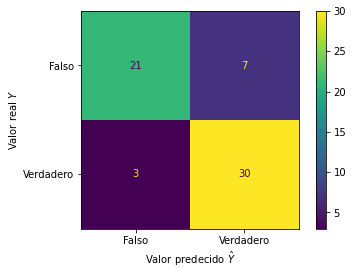

In [ ]:
plt.figure()
m_display.plot()
plt.ylabel('Valor real $Y$')
plt.xlabel('Valor predecido $\hat{Y}$')
plt.show()
m_display.figure_.savefig("cfm.pdf")

Conculsion: Dado que se realizo PCA al inicio para reducir nuestra cantidad de variables a solo 3 componentes estos obtuvieron muy buen resultado, 
dado que nuestro problema es de tipo salud , los **error de tipo 2** son minimos. 